<a href="https://colab.research.google.com/github/xydeep21/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection**
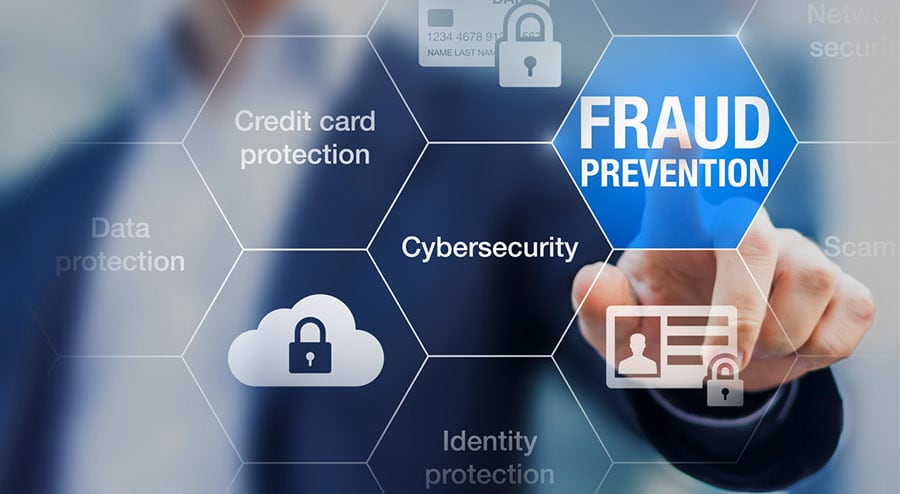

## **1.Introduction**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## **2.Data Information**
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 	284807 transactions.
It contains only numerical input variables which are the result of a PCA transformation (V1-V28) in order to protect the users privacy.
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


### **2.1 Data Resources**
This dataset is created by Machine Learning Group - ULB on Kaggle.



### **2.2 Loadiong Packages and data**

In [130]:
import numpy as mp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
row_data = pd.read_csv("/content/drive/MyDrive/CREDIT CARD FRAUD DETECTION DATASET/creditcard.csv")

### **2.3 Gather Sense of Our Data**


In [11]:
row_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
row_data.shape

(284807, 31)

In [10]:
row_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


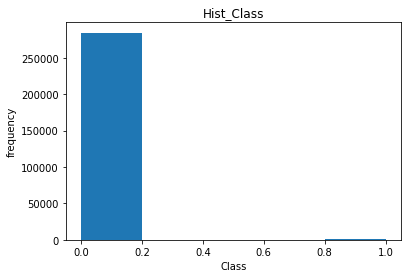

In [17]:
## There is no missing value and duplicate values in the dataset and V1-V28 fields are already scaled
## Check the target variables first
fraud_class = row_data.Class
plt.hist(fraud_class,bins=5)
plt.xlabel("Class")
plt.ylabel("frequency")
plt.title("Hist_Class")
plt.show()

This histogram shows that the target variable is highly imbalanced which means that this is not a classification problem and we can not use "accuracy" as the standard to judge the model.

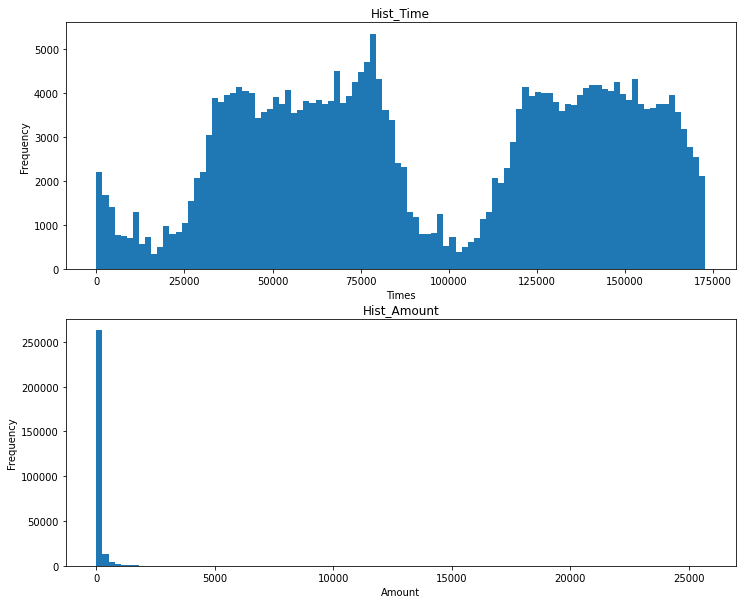

In [40]:
## Check other two features "Times" & "Amount"
fig = plt.figure(figsize=(12,10))
fig.add_subplot(211)
times = row_data.Time
plt.xlabel("Times")
plt.ylabel("Frequency")
plt.title("Hist_Time")
plt.hist(times,bins=100)
fig.add_subplot(212)
amounts = row_data.Amount
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.title("Hist_Amount")
plt.hist(amounts,bins=100)
plt.show()


From these two plots we noticed that : first the magnitude of Amount and Time is differenct with other 28 features we have to sacle them using standardization method because the variance of these two features are also big. Then we should make sure these two features are randomly seperated into our fraud and non-fraud datasets.


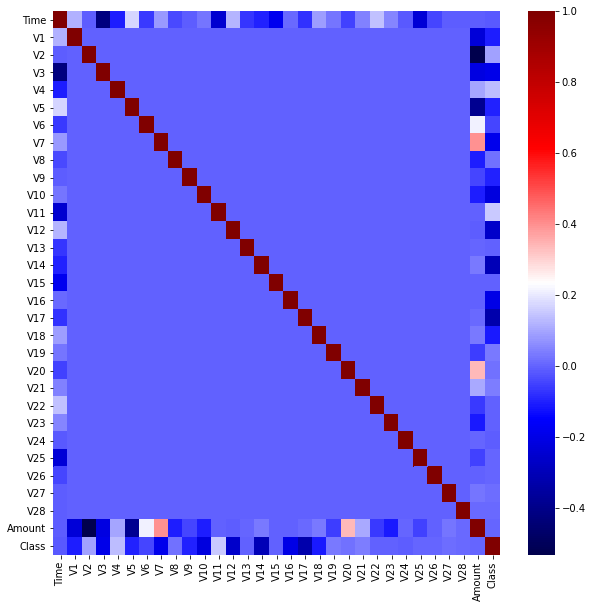

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(data=row_data.corr(), cmap="seismic")
plt.show()

This heatmap shows that there are no correlations between features V1 to V28 which means that we can not drop any of them.

### **2.4 Feature Scaling**

In [51]:
from sklearn.preprocessing import StandardScaler
row_data["normAmount"] = StandardScaler().fit_transform(row_data["Amount"].values.reshape(-1,1))
row_data["normTime"] = StandardScaler().fit_transform(row_data["Time"].values.reshape(-1,1))
data = row_data.drop(["Time","Amount"],axis=1)
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


# **3. Split the Data**

I want to have 60:20:20 train dataset, validationdataset, and test dataset and the fraud cases are evenly seperated into train dataset and test dataset.

In [65]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
x = data.drop(["Class"],axis=1)
y = data["Class"]
x_v,x_test,y_v,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train,x_validation,y_train,y_validation = train_test_split(x_v,y_v,test_size=0.2,random_state=1)
train_fraud_rate = y_train.value_counts()[1] / len(y_train)
test_fraud_rate = y_test.value_counts()[1] / len(y_test)
print(train_fraud_rate,test_fraud_rate)

0.00179946893721609 0.0015273340121484498


The fraud rate of whole dataset is 0.172% and the train_fraud_rate is 0.179% the test_fraud_rate is 0.152% which is fine for modeling




In [71]:
print(x_train.shape,y_train.shape)
print(x_validation.shape,y_validation.shape)
print(x_test.shape,y_test.shape)

(182276, 30) (182276,)
(45569, 30) (45569,)
(56962, 30) (56962,)


## **4. Model Building**

### **4.1 Keras Nural Network**

In [88]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(64,input_shape=(x_train.shape[1],), activation="relu", kernel_regularizer="l2"))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
history = model.fit(x_train,y_train,validation_data = (x_validation,y_validation), batch_size=10000, epochs=100)

Epoch 1/100
19/19 [==============================] - 1s 34ms/step - loss: 0.8043 - accuracy: 0.9763 - val_loss: 0.6046 - val_accuracy: 0.9983
Epoch 2/100
19/19 [==============================] - 0s 23ms/step - loss: 0.4794 - accuracy: 0.9982 - val_loss: 0.3676 - val_accuracy: 0.9983
Epoch 3/100
19/19 [==============================] - 0s 23ms/step - loss: 0.3186 - accuracy: 0.9982 - val_loss: 0.2667 - val_accuracy: 0.9983
Epoch 4/100
19/19 [==============================] - 0s 23ms/step - loss: 0.2392 - accuracy: 0.9982 - val_loss: 0.2041 - val_accuracy: 0.9983
Epoch 5/100
19/19 [==============================] - 0s 24ms/step - loss: 0.1840 - accuracy: 0.9982 - val_loss: 0.1576 - val_accuracy: 0.9983
Epoch 6/100
19/19 [==============================] - 0s 24ms/step - loss: 0.1426 - accuracy: 0.9982 - val_loss: 0.1219 - val_accuracy: 0.9983
Epoch 7/100
19/19 [==============================] - 0s 23ms/step - loss: 0.1105 - accuracy: 0.9982 - val_loss: 0.0945 - val_accuracy: 0.9983
Epoch 

In [89]:
score = model.evaluate(x_test, y_test)
print(score)

1781/1781 [==============================] - 2s 921us/step - loss: 0.0034 - accuracy: 0.9994
[0.0034313183277845383, 0.9993855357170105]


The model works pretty well but as mentioned above this is a highly imbalanced dataset so we need to build up a confusion matrix in order to make a judgment.


In [102]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(x_test)
confusion_matrix(y_test,y_pred)


array([[56863,    12],
       [   23,    64]])

In [123]:
##Calculate precision and recall 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
nn_precision = precision_score(y_test,y_pred,average="macro")
nn_recall = recall_score(y_test,y_pred,average="macro")
print(nn_precision,nn_recall)

0.9208504728755758 0.8677105974485284


## **4.2 Random Forest**

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(x_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
y_pred_2 = rf_clf.predict(x_test)
confusion_matrix(y_test,y_pred_2)

array([[56869,     6],
       [   21,    66]])

In [124]:
rf_precision = precision_score(y_test,y_pred_2,average="macro")
rf_recall = recall_score(y_test,y_pred_2,average="macro")
print(rf_precision,rf_recall)

0.9581487666256518 0.8792575975748389


# **5. Model Comparison**

In [137]:
comparison = {"score":["precision","recall"],
              "Nural Network":[nn_precision,nn_recall],
              "Random Forest":[rf_precision,rf_recall]}
df = DataFrame(comparison)
df.set_index("score",inplace=True)
df

,Nural Network,Random Forest
score,,
precision,0.920850,0.958149
recall,0.867711,0.879258


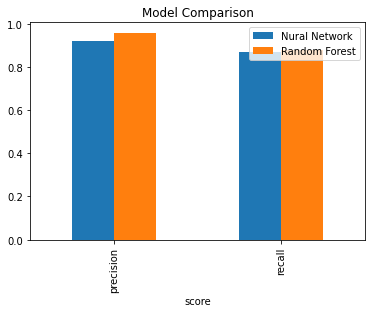

In [138]:
df.plot(kind="bar",title="Model Comparison")
plt.show()

Both models have good prediction results. The prediction results of random forest are better, but the calculation speed of this neural network is faster.